In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter 
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
from statsmodels.graphics import correlation

%matplotlib inline

In [2]:
df = pd.read_csv("country_wise_latest.csv")
df.columns = [c.replace('/', '_') for c in df.columns]
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head(5)

,Country_Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths___100_Cases,Recovered___100_Cases,Deaths___100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,WHO_Region
0,Afghanistan,28424,569,8292,19563,546,21,330,2.00,29.17,6.86,24102,4322,17.93,Eastern Mediterranean
1,Albania,1891,43,1126,722,53,1,12,2.27,59.55,3.82,1464,427,29.17,Europe
2,Algeria,11631,837,8324,2470,127,12,128,7.20,71.57,10.06,10810,821,7.59,Africa
3,Andorra,855,52,792,11,0,0,0,6.08,92.63,6.57,853,2,0.23,Europe
4,Angola,176,9,66,101,4,1,0,5.11,37.50,13.64,138,38,27.54,Africa


In [3]:
df.tail(5)

,Country_Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths___100_Cases,Recovered___100_Cases,Deaths___100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,WHO_Region
182,West Bank and Gaza,784,3,437,344,109,0,0,0.38,55.74,0.69,489,295,60.33,Eastern Mediterranean
183,Western Sahara,9,1,8,0,0,0,0,11.11,88.89,12.50,9,0,0.00,Africa
184,Yemen,922,254,328,340,3,3,40,27.55,35.57,77.44,705,217,30.78,Eastern Mediterranean
185,Zambia,1430,11,1194,225,0,0,0,0.77,83.50,0.92,1357,73,5.38,Africa
186,Zimbabwe,479,4,63,412,0,0,0,0.84,13.15,6.35,356,123,34.55,Africa


In [4]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths___100_Cases,Recovered___100_Cases,Deaths___100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase
count,1.870000e+02,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000,1.870000e+02,187.000000,187.000000
mean,4.701098e+04,2483.684492,22995.529412,2.153176e+04,679.363636,23.786096,639.796791,3.326150,61.463102,inf,4.159433e+04,5416.647059,14.893957
std,1.925862e+05,10788.180847,74792.605582,1.183264e+05,2827.944252,99.826232,2581.364385,3.724072,28.181246,NaN,1.738075e+05,21294.683186,16.965682
min,4.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,4.000000e+00,0.000000,0.000000
25%,6.385000e+02,9.000000,199.500000,7.700000e+01,0.000000,0.000000,0.000000,0.865000,40.075000,1.485,5.190000e+02,26.500000,1.655000
50%,2.755000e+03,58.000000,1319.000000,5.690000e+02,19.000000,0.000000,5.000000,2.160000,65.240000,4.100,2.238000e+03,176.000000,8.760000
75%,2.098200e+04,499.500000,10372.500000,6.720500e+03,317.000000,6.000000,132.500000,4.605000,87.635000,8.675,1.777750e+04,2461.000000,24.465000
max,2.255119e+06,119719.000000,617460.000000,1.517940e+06,32540.000000,1022.000000,25148.000000,27.550000,100.000000,inf,2.074526e+06,182399.000000,120.000000


In [3]:
print('Total no. of cases in the world ',df['Confirmed'].sum())

Total no. of cases in the world  8791053


In [5]:
print('Total no. of deaths in the world ',df['Deaths'].sum())

Total no. of deaths in the world  464449


In [6]:
print('Total no. of active cases in the world ',df['Active'].sum())

Total no. of active cases in the world  4026440


In [7]:
print('Total no. of recovered cases in the world ',df['Recovered'].sum())

Total no. of recovered cases in the world  4300164


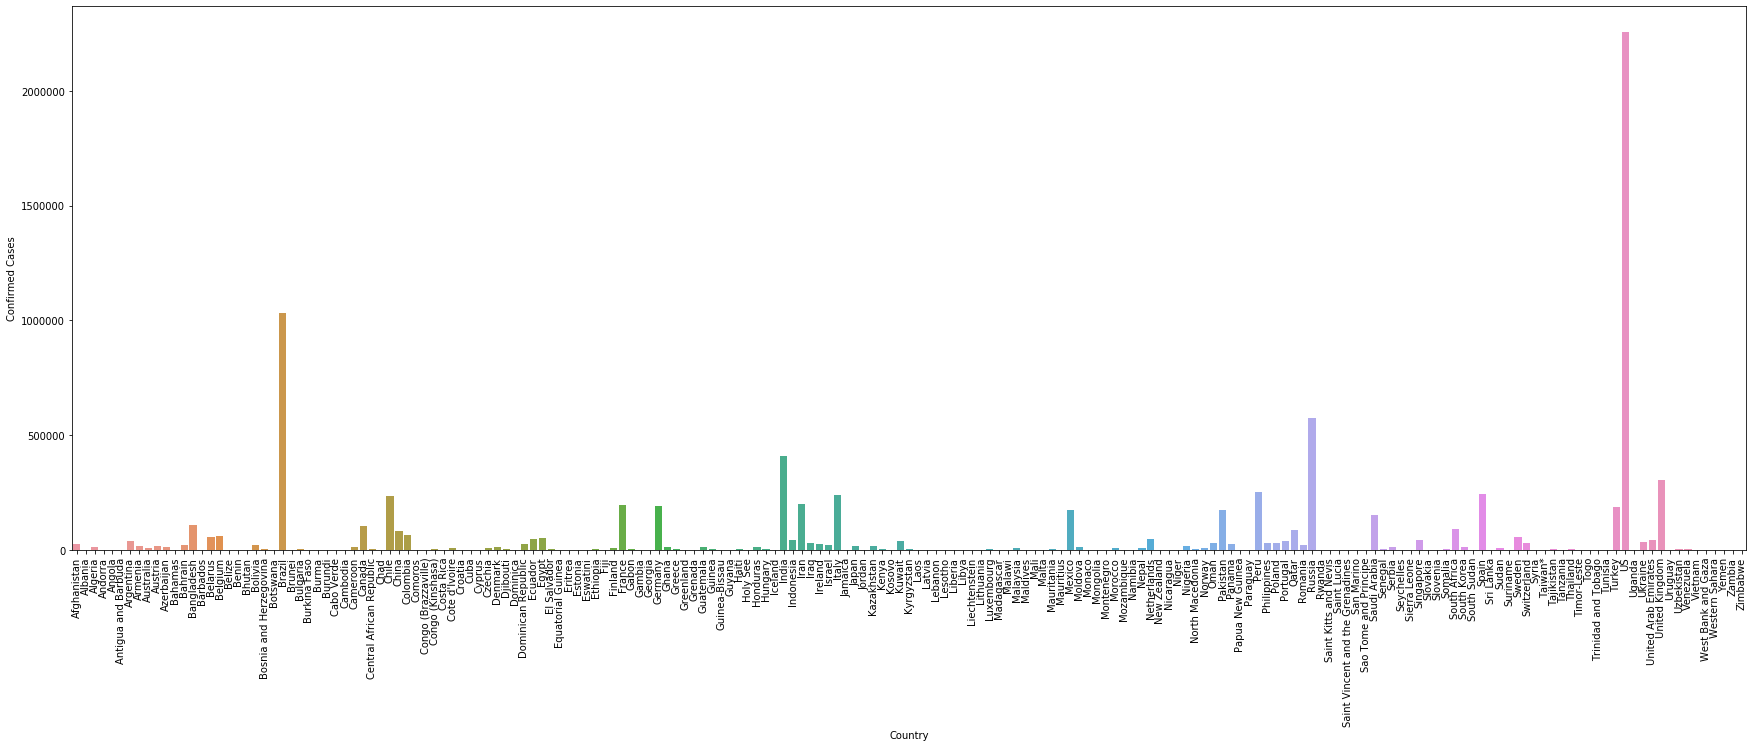

In [16]:
#Let us plot the no of total cases per country using a vertical barplot
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['Country_Region'], y = df['Confirmed'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Confirmed Cases')
plt.show(fig)

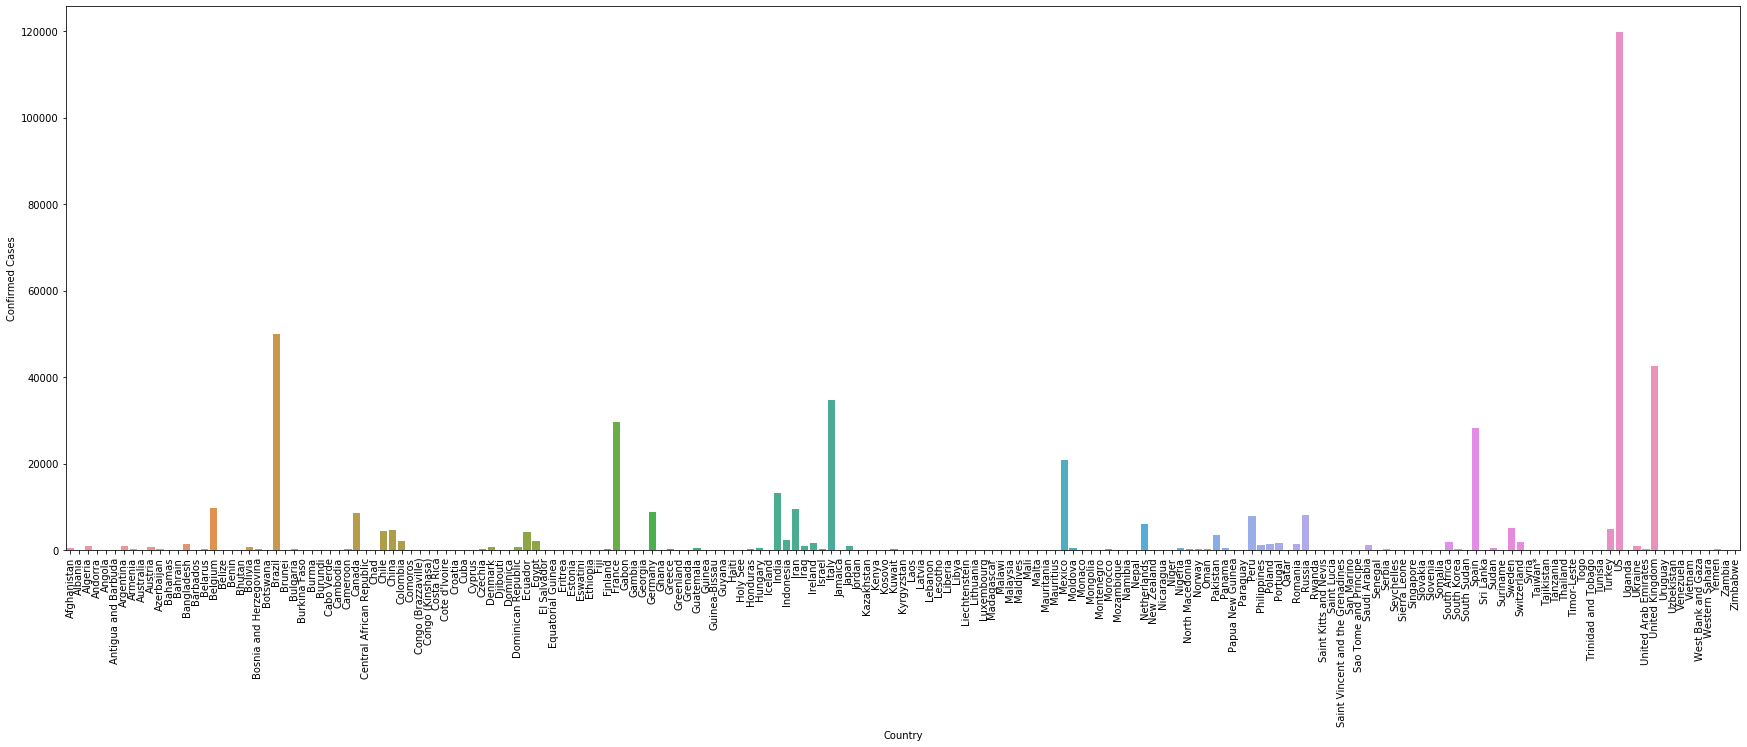

In [17]:
#Plotting deaths per country
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['Country_Region'], y = df['Deaths'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Deaths')
plt.show(fig)

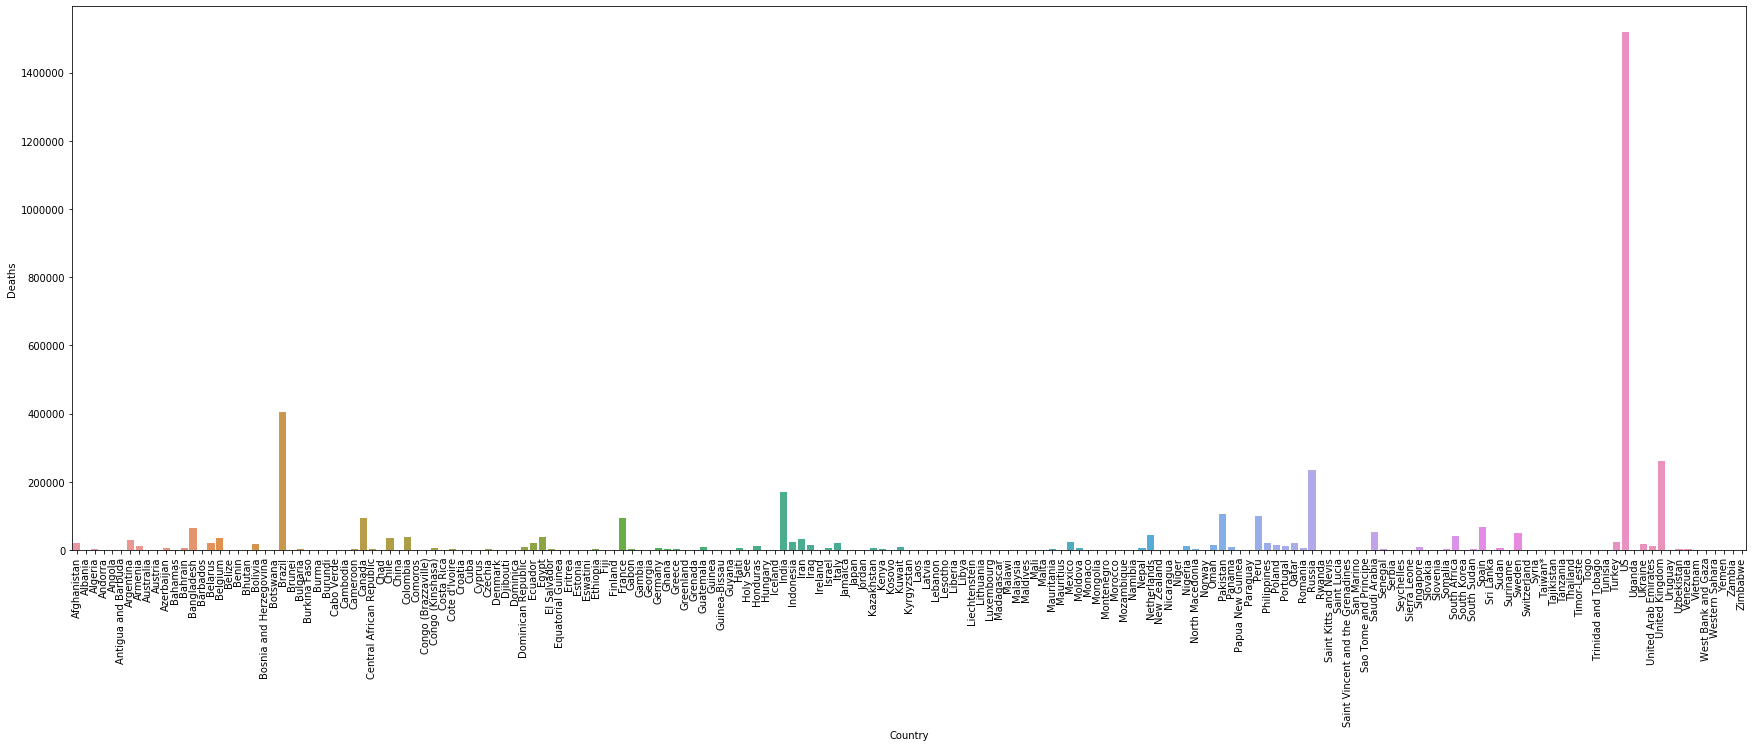

In [19]:
#Plotting Active cases per country
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['Country_Region'], y = df['Active'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Deaths')
plt.show(fig)

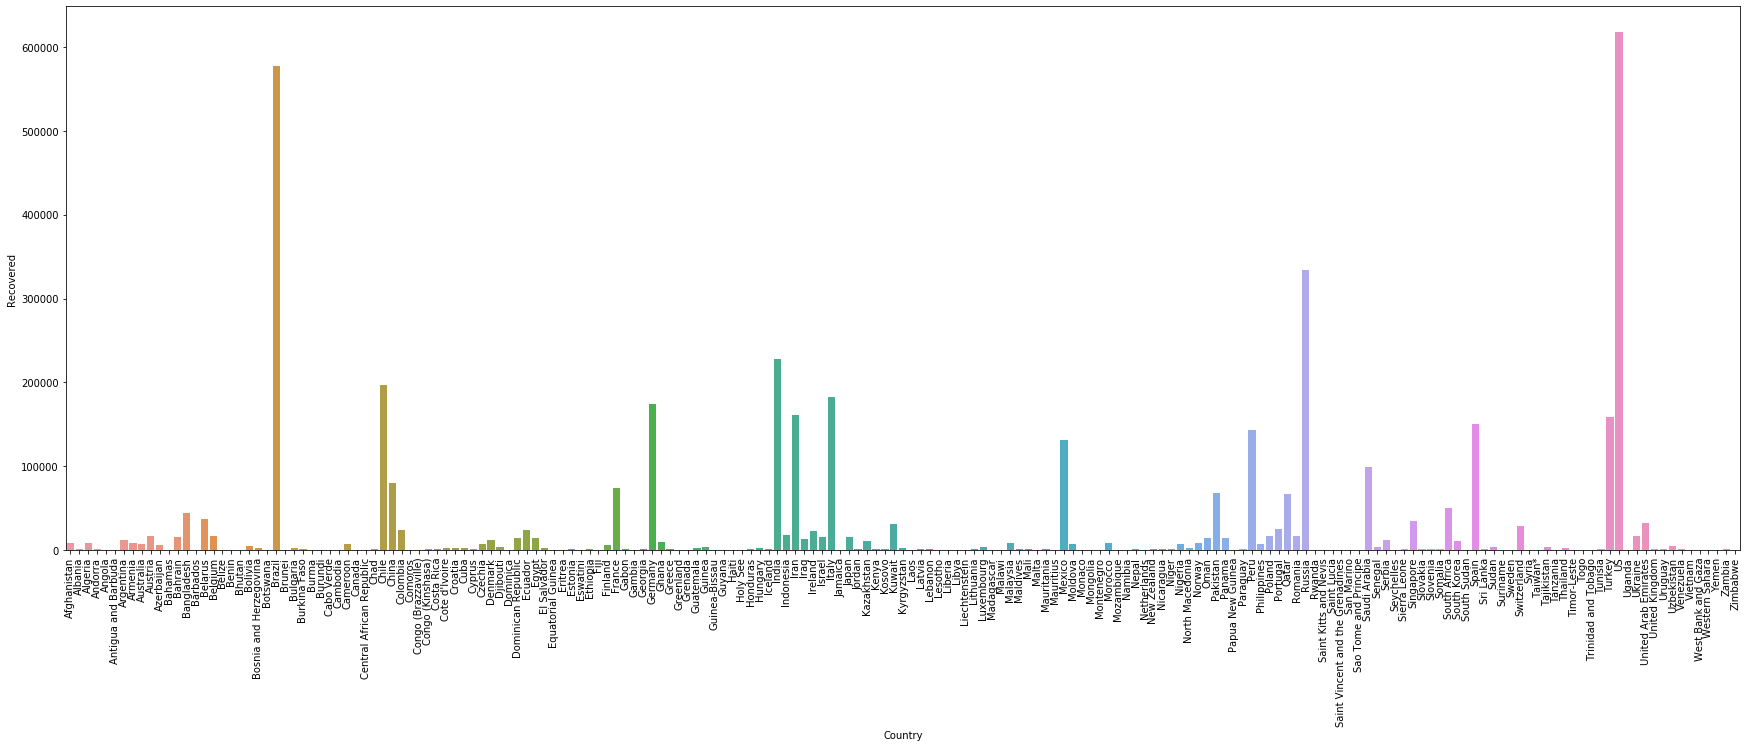

In [22]:
#Plotting Recovered patients per country
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['Country_Region'], y = df['Recovered'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Recovered')
plt.show(fig)

In [69]:
a = []
df1 = df['New_cases'].sort_values(axis = 0,ascending = False).reset_index()
df2 = df1.loc[:4]['New_cases']
x = df2.values
y = df.iloc[:,0].values
z = df.iloc[:,5].values
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            a.append(y[j])
a

['US', 'India', 'Russia', 'Peru', 'Chile']

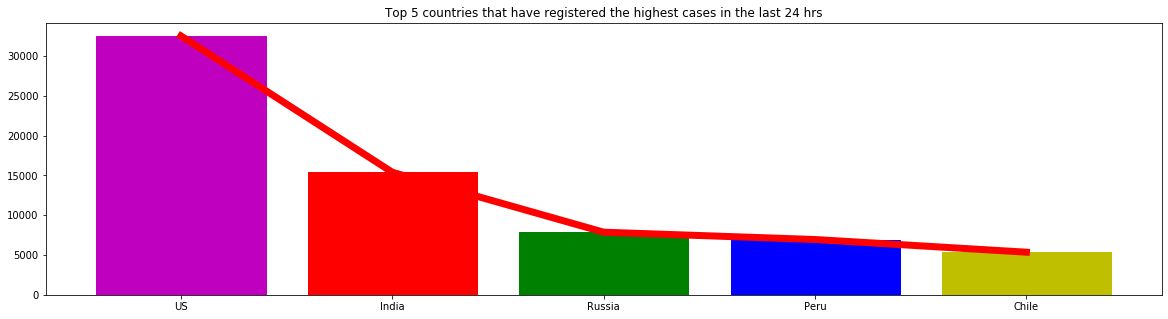

In [70]:
# Question 1:- Top 5 countries that have recorded the highest spike in Covid-19 cases in the last 24 hours
plt.figure(figsize=(20,5))
barlist = plt.bar(a,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(a, x, c='red',linewidth=7.0)
plt.title('Top 5 countries that have registered the highest cases in the last 24 hrs')
plt.show()

In [71]:
a = []
df1 = df['New_deaths'].sort_values(axis = 0,ascending = False).reset_index()
df2 = df1.loc[:4]['New_deaths']
x = df2.values
y = df.iloc[:,0].values
z = df.iloc[:,6].values
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            a.append(y[j])
a

['Brazil', 'US', 'Peru', 'Mexico', 'India']

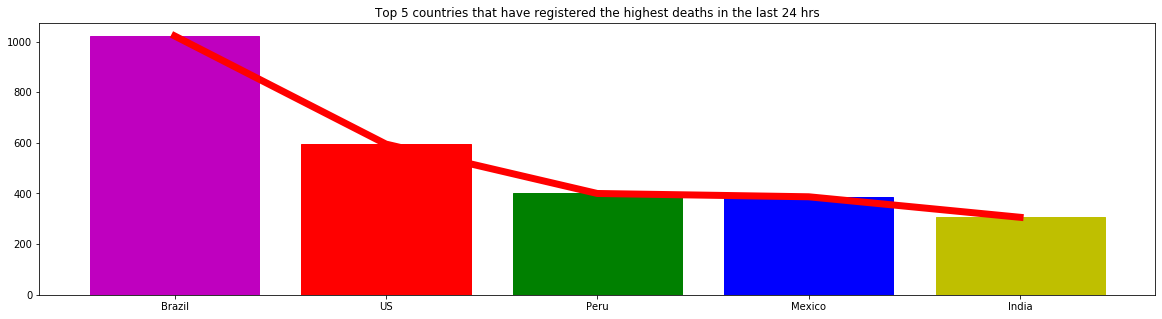

In [72]:
# Question 2:- Top 5 countries that have recorded the highest Covid-19 deaths in the last 24 hours
plt.figure(figsize=(20,5))
barlist = plt.bar(a,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(a, x, c='red',linewidth=7.0)
plt.title('Top 5 countries that have registered the highest deaths in the last 24 hrs')
plt.show()

In [33]:
a = []
df1 = df['New_recovered'].sort_values(axis = 0,ascending = False).reset_index()
df2 = df1.loc[:4]['New_recovered']
x = df2.values
y = df.iloc[:,0].values
z = df.iloc[:,7].values
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            a.append(y[j])
a

['Brazil', 'India', 'Peru', 'US', 'Russia']

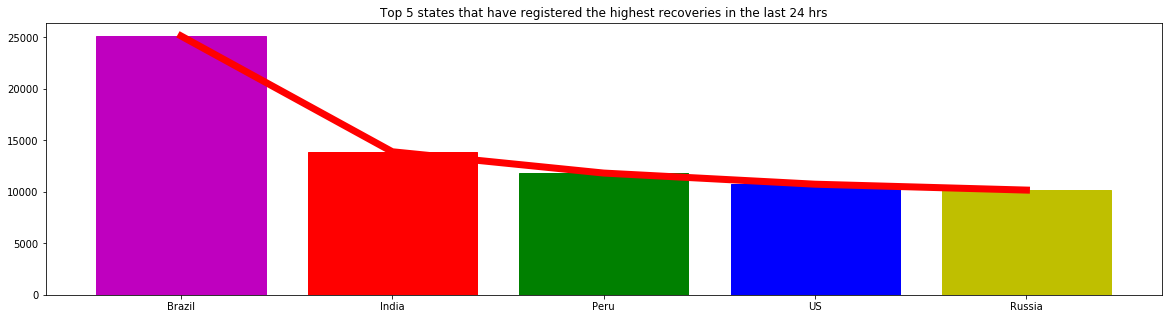

In [34]:
# Question 3:- Top 5 countries that have recorded the highest no. of recoveries in the last 24 hours
plt.figure(figsize=(20,5))
barlist = plt.bar(a,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(a, x, c='red',linewidth=7.0)
plt.title('Top 5 states that have registered the highest recoveries in the last 24 hrs')
plt.show()

In [42]:
a = []
df1 = df['1_week_change'].sort_values(axis = 0,ascending = False).reset_index()
df2 = df1.loc[:4]['1_week_change']
x = df2.values
y = df.iloc[:,0].values
z = df.iloc[:,12].values
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            a.append(y[j])
a

['Brazil', 'US', 'India', 'Chile', 'Russia']

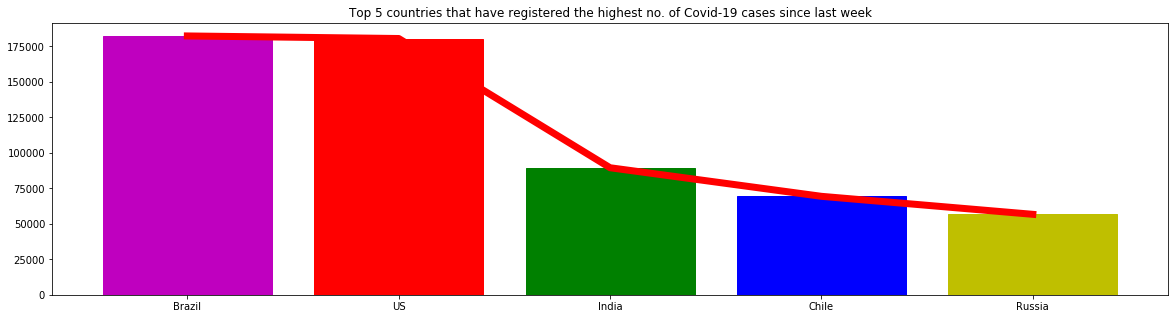

In [43]:
# Question 4:- Top 5 countries that have recorded the highest no. of cases since last week 
plt.figure(figsize=(20,5))
barlist = plt.bar(a,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(a, x, c='red',linewidth=7.0)
plt.title('Top 5 countries that have registered the highest no. of Covid-19 cases since last week')
plt.show()

In [45]:
a = []
df1 = df['1_week_%_increase'].sort_values(axis = 0,ascending = False).reset_index()
df2 = df1.loc[:4]['1_week_%_increase']
x = df2.values
y = df.iloc[:,0].values
z = df.iloc[:,13].values
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            a.append(y[j])
a

['Eritrea', 'Mauritania', 'Nepal', 'West Bank and Gaza', 'Benin']

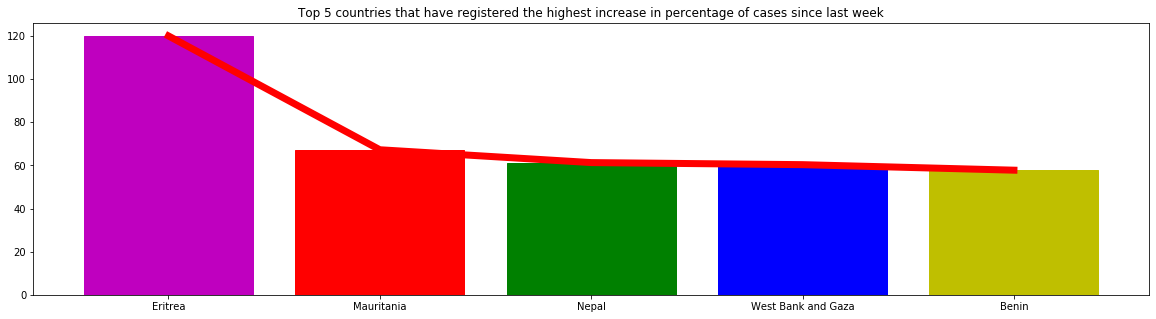

In [46]:
# Question 4:- Top 5 countries that have recorded the highest increase in percentage of cases since last week 
plt.figure(figsize=(20,5))
barlist = plt.bar(a,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(a, x, c='red',linewidth=7.0)
plt.title('Top 5 countries that have registered the highest increase in percentage of cases since last week')
plt.show()

In [6]:
a = []
df1 = df['Deaths___100_Cases'].sort_values(axis = 0,ascending = False).reset_index()
df2 = df1.loc[:10]['Deaths___100_Cases']
x = df2.values
y = df.iloc[:,0].values
z = df.iloc[:,8].values
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            a.append(y[j])
a

['Yemen',
 'Belgium',
 'France',
 'Italy',
 'United Kingdom',
 'Hungary',
 'Netherlands',
 'Mexico',
 'Antigua and Barbuda',
 'Spain',
 'Western Sahara']

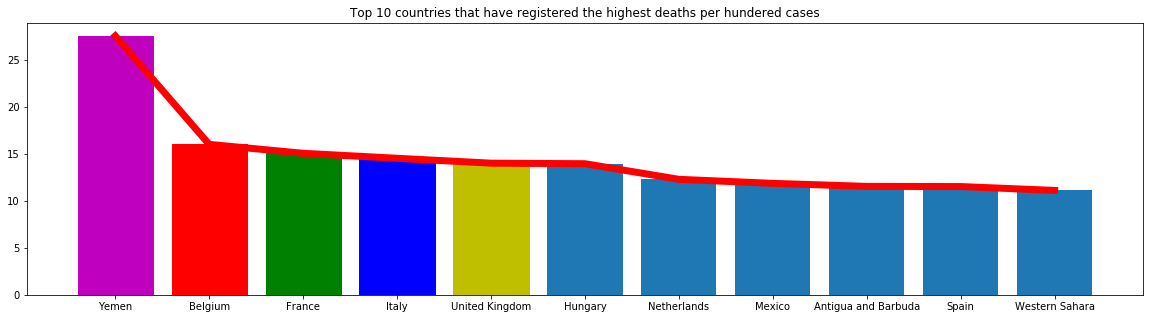

In [8]:
plt.figure(figsize=(20,5))
barlist = plt.bar(a,x)
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
plt.plot(a, x, c='red',linewidth=7.0)
plt.title('Top 10 countries that have registered the highest deaths per hundered cases')
plt.show()

In [11]:
a = []
df1 = df['Recovered___100_Cases'].sort_values(axis = 0,ascending = False).reset_index()
df2 = df1.loc[:10]['Recovered___100_Cases']
x = df2.values
y = df.iloc[:,0].values
z = df.iloc[:,9].values
for i in range(0,x.shape[0]):
    for j in range(0,z.shape[0]):
        if z[j] == x[i]:
            a.append(y[j])
a

['Dominica',
 'Fiji',
 'Greenland',
 'Grenada',
 'Holy See',
 'Laos',
 'Papua New Guinea',
 'Saint Kitts and Nevis',
 'Seychelles',
 'Dominica',
 'Fiji',
 'Greenland',
 'Grenada',
 'Holy See',
 'Laos',
 'Papua New Guinea',
 'Saint Kitts and Nevis',
 'Seychelles',
 'Dominica',
 'Fiji',
 'Greenland',
 'Grenada',
 'Holy See',
 'Laos',
 'Papua New Guinea',
 'Saint Kitts and Nevis',
 'Seychelles',
 'Dominica',
 'Fiji',
 'Greenland',
 'Grenada',
 'Holy See',
 'Laos',
 'Papua New Guinea',
 'Saint Kitts and Nevis',
 'Seychelles',
 'Dominica',
 'Fiji',
 'Greenland',
 'Grenada',
 'Holy See',
 'Laos',
 'Papua New Guinea',
 'Saint Kitts and Nevis',
 'Seychelles',
 'Dominica',
 'Fiji',
 'Greenland',
 'Grenada',
 'Holy See',
 'Laos',
 'Papua New Guinea',
 'Saint Kitts and Nevis',
 'Seychelles',
 'Dominica',
 'Fiji',
 'Greenland',
 'Grenada',
 'Holy See',
 'Laos',
 'Papua New Guinea',
 'Saint Kitts and Nevis',
 'Seychelles',
 'Dominica',
 'Fiji',
 'Greenland',
 'Grenada',
 'Holy See',
 'Laos',
 'Papu

In [63]:
a = df['WHO_Region'].unique()
x = np.array(df['WHO_Region'])
y = np.array(df['Confirmed'])
z = np.zeros(a.shape[0])
sum_value = 0
s = {}
for i in range(0,a.shape[0]):
    for j in range(0,x.shape[0]):
        if x[j] == a[i]:
            sum_value = sum_value + y[j]
    s[a[i]] = sum_value
    sum_value = 0
s

{'Eastern Mediterranean': 896795,
 'Europe': 2561573,
 'Africa': 215915,
 'Americas': 4331471,
 'Western Pacific': 204776,
 'South-East Asia': 580523}

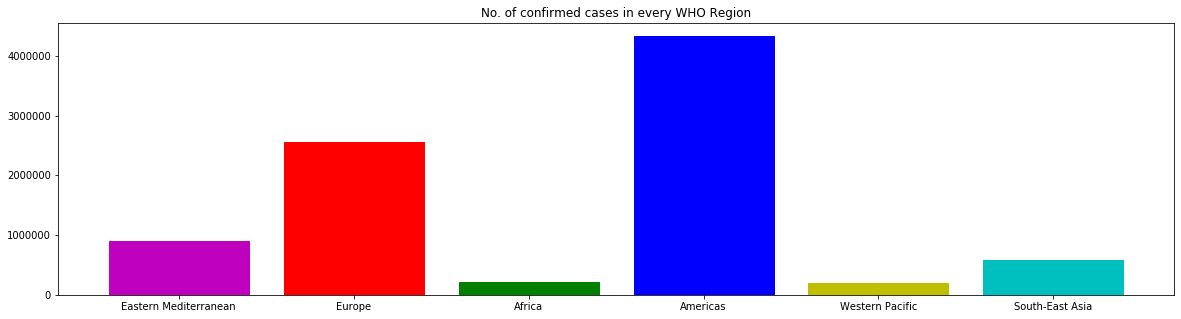

In [64]:
plt.figure(figsize=(20,5))
keys = s.keys()
values = s.values()
barlist = plt.bar(range(len(s)), list(s.values()))
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
barlist[5].set_color('c')
plt.plot(range(len(s)), list(s.values()), c='red',linewidth=0)
plt.xticks(range(len(s)), list(s.keys()))
plt.title('No. of confirmed cases in every WHO Region')
plt.show()

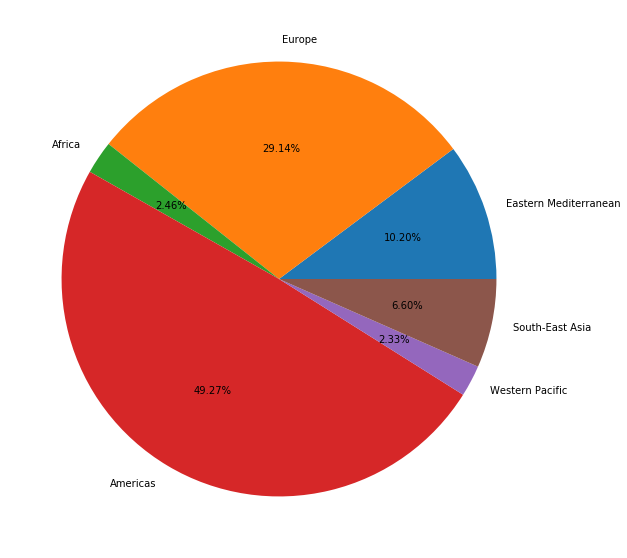

In [65]:
#Contribution of every WHO Region in percentages
plt.figure(figsize=(20,10))
keys = Counter(s).keys()
values = Counter(s).values()
plt.pie([float(v) for v in values], labels=[k for k in keys],
           autopct='%1.2f%%')
plt.show()

In [58]:
a = df['WHO_Region'].unique()
x = np.array(df['WHO_Region'])
y = np.array(df['Deaths'])
z = np.zeros(a.shape[0])
sum_value = 0
f = {}
for i in range(0,a.shape[0]):
    for j in range(0,x.shape[0]):
        if x[j] == a[i]:
            sum_value = sum_value + y[j]
    f[a[i]] = sum_value
    sum_value = 0
f

{'Eastern Mediterranean': 20060,
 'Europe': 193358,
 'Africa': 4886,
 'Americas': 221627,
 'Western Pacific': 7305,
 'South-East Asia': 17213}

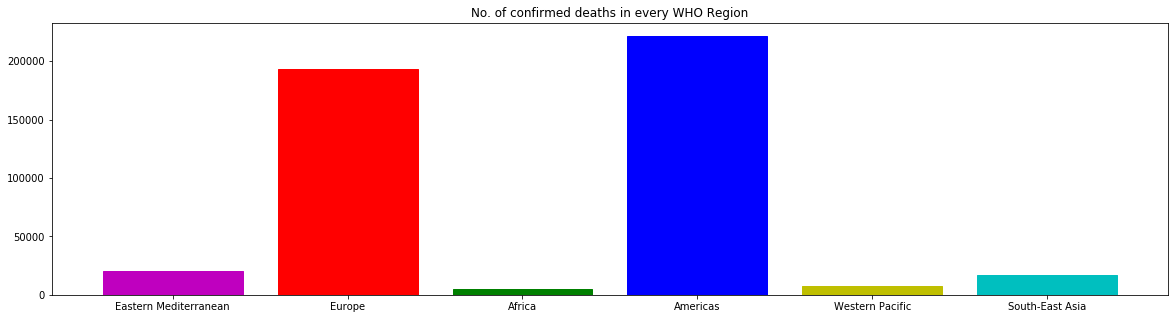

In [59]:
plt.figure(figsize=(20,5))
keys = f.keys()
values = f.values()
barlist = plt.bar(range(len(f)), list(f.values()))
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
barlist[5].set_color('c')
plt.plot(range(len(f)), list(f.values()), c='red',linewidth=0)
plt.xticks(range(len(f)), list(f.keys()))
plt.title('No. of confirmed deaths in every WHO Region')
plt.show()

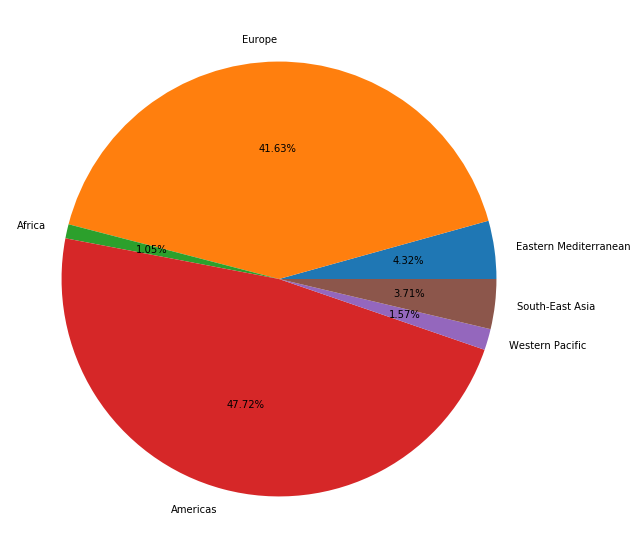

In [62]:
#Death in every WHO Region in percentages
plt.figure(figsize=(20,10))
keys = Counter(f).keys()
values = Counter(f).values()
plt.pie([float(v) for v in values], labels=[k for k in keys],
           autopct='%1.2f%%')
plt.show()

In [66]:
a = df['WHO_Region'].unique()
x = np.array(df['WHO_Region'])
y = np.array(df['Recovered'])
z = np.zeros(a.shape[0])
sum_value = 0
b = {}
for i in range(0,a.shape[0]):
    for j in range(0,x.shape[0]):
        if x[j] == a[i]:
            sum_value = sum_value + y[j]
    b[a[i]] = sum_value
    sum_value = 0
b

{'Eastern Mediterranean': 543308,
 'Europe': 1408151,
 'Africa': 111139,
 'Americas': 1773923,
 'Western Pacific': 165957,
 'South-East Asia': 297686}

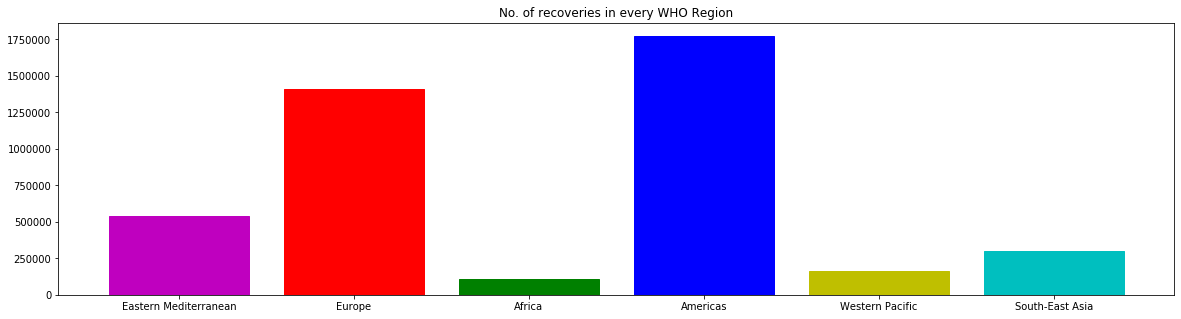

In [67]:
plt.figure(figsize=(20,5))
keys = b.keys()
values = b.values()
barlist = plt.bar(range(len(b)), list(b.values()))
barlist[0].set_color('m')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('b')
barlist[4].set_color('y')
barlist[5].set_color('c')
plt.plot(range(len(b)), list(b.values()), c='red',linewidth=0)
plt.xticks(range(len(b)), list(b.keys()))
plt.title('No. of recoveries in every WHO Region')
plt.show()

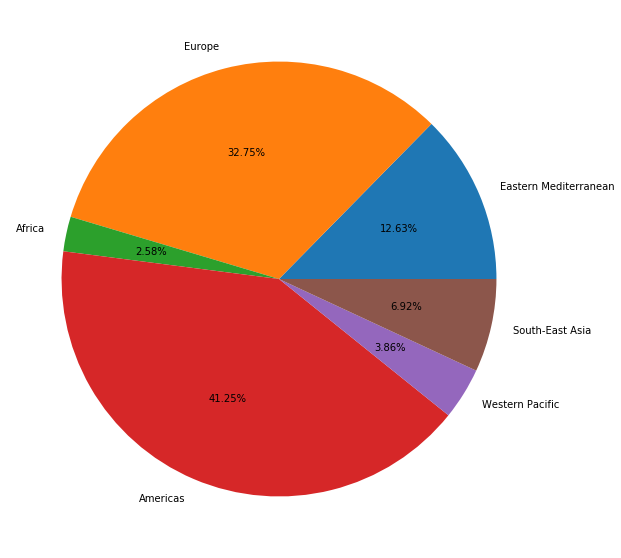

In [68]:
plt.figure(figsize=(20,10))
keys = Counter(b).keys()
values = Counter(b).values()
plt.pie([float(v) for v in values], labels=[k for k in keys],
           autopct='%1.2f%%')
plt.show()

In [7]:
#Calculating Z-scores of the confirmed cases,active cases,deaths,recovered
z_score_confirmed = np.array(df['Confirmed'] - df['Confirmed'].mean()/df['Confirmed'].std(ddof = 0))
z_score_death = np.array(df['Deaths'] - df['Deaths'].mean()/df['Deaths'].std(ddof = 0))
z_score_active = np.array(df['Active'] - df['Active'].mean()/df['Active'].std(ddof = 0))
z_score_recovered = np.array(df['Recovered'] - df['Recovered'].mean()/df['Recovered'].std(ddof = 0))
print("Z score of the confirmed cases = ",z_score_confirmed)
print("Z score of the deaths = ",z_score_death)
print("Z score of the active cases = ",z_score_active)
print("Z score of the recovered cases = ",z_score_recovered)

Z score of the confirmed cases =  [2.84237552e+04 1.89075524e+03 1.16307552e+04 8.54755241e+02
 1.75755241e+02 2.57552411e+01 4.12037552e+04 1.97077552e+04
 7.46075524e+03 1.73227552e+04 1.22377552e+04 1.03755241e+02
 2.13307552e+04 1.08774755e+05 9.67552411e+01 5.79357552e+04
 6.05497552e+04 2.17552411e+01 6.49755241e+02 6.77552411e+01
 2.35117552e+04 3.27275524e+03 8.87552411e+01 1.03291276e+06
 1.40755241e+02 3.87175524e+03 9.00755241e+02 2.86755241e+02
 1.03755241e+02 8.62755241e+02 1.28755241e+02 1.16097552e+04
 1.02748755e+05 2.68575524e+03 8.57755241e+02 2.36747755e+05
 8.45527552e+04 6.34537552e+04 2.46755241e+02 8.82755241e+02
 5.67175524e+03 2.12675524e+03 7.27575524e+03 2.29875524e+03
 2.30875524e+03 9.84755241e+02 1.04477552e+04 1.25777552e+04
 4.56475524e+03 1.77552411e+01 2.57777552e+04 4.97307552e+04
 5.37577552e+04 4.47475524e+03 1.66375524e+03 1.42755241e+02
 1.98075524e+03 6.26755241e+02 4.46875524e+03 1.77552411e+01
 7.14175524e+03 1.96723755e+05 4.42775524e+03 3.675

In [8]:
print("Z score of the deaths = ",z_score_death)

Z score of the deaths =  [ 5.68769159e+02  4.27691592e+01  8.36769159e+02  5.17691592e+01
  8.76915922e+00  2.76915922e+00  9.91769159e+02  3.31769159e+02
  1.01769159e+02  6.87769159e+02  1.47769159e+02  1.07691592e+01
  5.97691592e+01  1.42476916e+03  6.76915922e+00  3.42769159e+02
  9.69576916e+03  1.76915922e+00  1.07691592e+01 -2.30840783e-01
  7.39769159e+02  1.68769159e+02  7.69159217e-01  4.99757692e+04
  2.76915922e+00  1.98769159e+02  5.27691592e+01  5.76915922e+00
  7.69159217e-01  7.76915922e+00 -2.30840783e-01  3.00769159e+02
  8.46476916e+03  1.87691592e+01  7.37691592e+01  4.29476916e+03
  4.63876916e+03  2.14776916e+03  4.76915922e+00  2.67691592e+01
  1.24769159e+02  1.17691592e+01  5.17691592e+01  1.06769159e+02
  8.47691592e+01  1.87691592e+01  3.35769159e+02  5.99769159e+02
  4.47691592e+01 -2.30840783e-01  6.54769159e+02  4.15576916e+03
  2.10576916e+03  9.27691592e+01  3.17691592e+01 -2.30840783e-01
  6.87691592e+01  4.76915922e+00  7.17691592e+01 -2.30840783e-01


In [9]:
print("Z score of the active cases = ",z_score_active)

Z score of the active cases =  [ 1.95628175e+04  7.21817542e+02  2.46981754e+03  1.08175422e+01
  1.00817542e+02  8.17542221e-01  2.80058175e+04  1.05218175e+04
  4.62817542e+02  4.59817542e+02  5.57381754e+03  1.88175422e+01
  5.48081754e+03  6.33568175e+04  4.81754222e+00  2.08438175e+04
  3.40828175e+04  2.81754222e+00  3.91817542e+02  3.78175422e+01
  1.76858175e+04  8.62817542e+02  6.28175422e+01  4.06157818e+05
 -1.82457779e-01  1.64581754e+03  3.78175422e+01  8.48175422e+01
  2.78175422e+01  4.77817542e+02  2.81754222e+00  3.60681754e+03
  9.42838175e+04  2.24681754e+03  3.78175422e+01  3.58438175e+04
  3.79817542e+02  3.72708175e+04  8.28175422e+01  4.64817542e+02
  4.73981754e+03  1.10081754e+03  4.23181754e+03  4.98175422e+01
  1.52817542e+02  1.41817542e+02  2.63481754e+03  5.08817542e+02
  9.54817542e+02 -1.82457779e-01  1.01658175e+04  2.11288175e+04
  3.73248175e+04  1.93281754e+03  1.11681754e+03  1.03817542e+02
  1.53817542e+02  3.36817542e+02  3.27481754e+03 -1.8245777

In [10]:
print("Z score of the recovered cases = ",z_score_recovered)

Z score of the recovered cases =  [ 8.29169172e+03  1.12569172e+03  8.32369172e+03  7.91691717e+02
  6.56917174e+01  2.16917174e+01  1.22056917e+04  8.85369172e+03
  6.89569172e+03  1.61746917e+04  6.51569172e+03  7.36917174e+01
  1.57896917e+04  4.39926917e+04  8.46917174e+01  3.67486917e+04
  1.67706917e+04  1.66917174e+01  2.46691717e+02  2.96917174e+01
  5.08569172e+03  2.24069172e+03  2.46917174e+01  5.76778692e+05
  1.37691717e+02  2.02669172e+03  8.09691717e+02  1.95691717e+02
  7.46917174e+01  3.76691717e+02  1.25691717e+02  7.70169172e+03
 -3.08282648e-01  4.19691717e+02  7.45691717e+02  1.96608692e+05
  7.95336917e+04  2.40346917e+04  1.58691717e+02  3.90691717e+02
  8.06691717e+02  1.01369172e+03  2.99169172e+03  2.14169172e+03
  2.07069172e+03  8.23691717e+02  7.47669172e+03  1.14686917e+04
  3.56469172e+03  1.76917174e+01  1.49566917e+04  2.44456917e+04
  1.43266917e+04  2.44869172e+03  5.14691717e+02  3.86917174e+01
  1.75769172e+03  2.84691717e+02  1.12169172e+03  1.7691

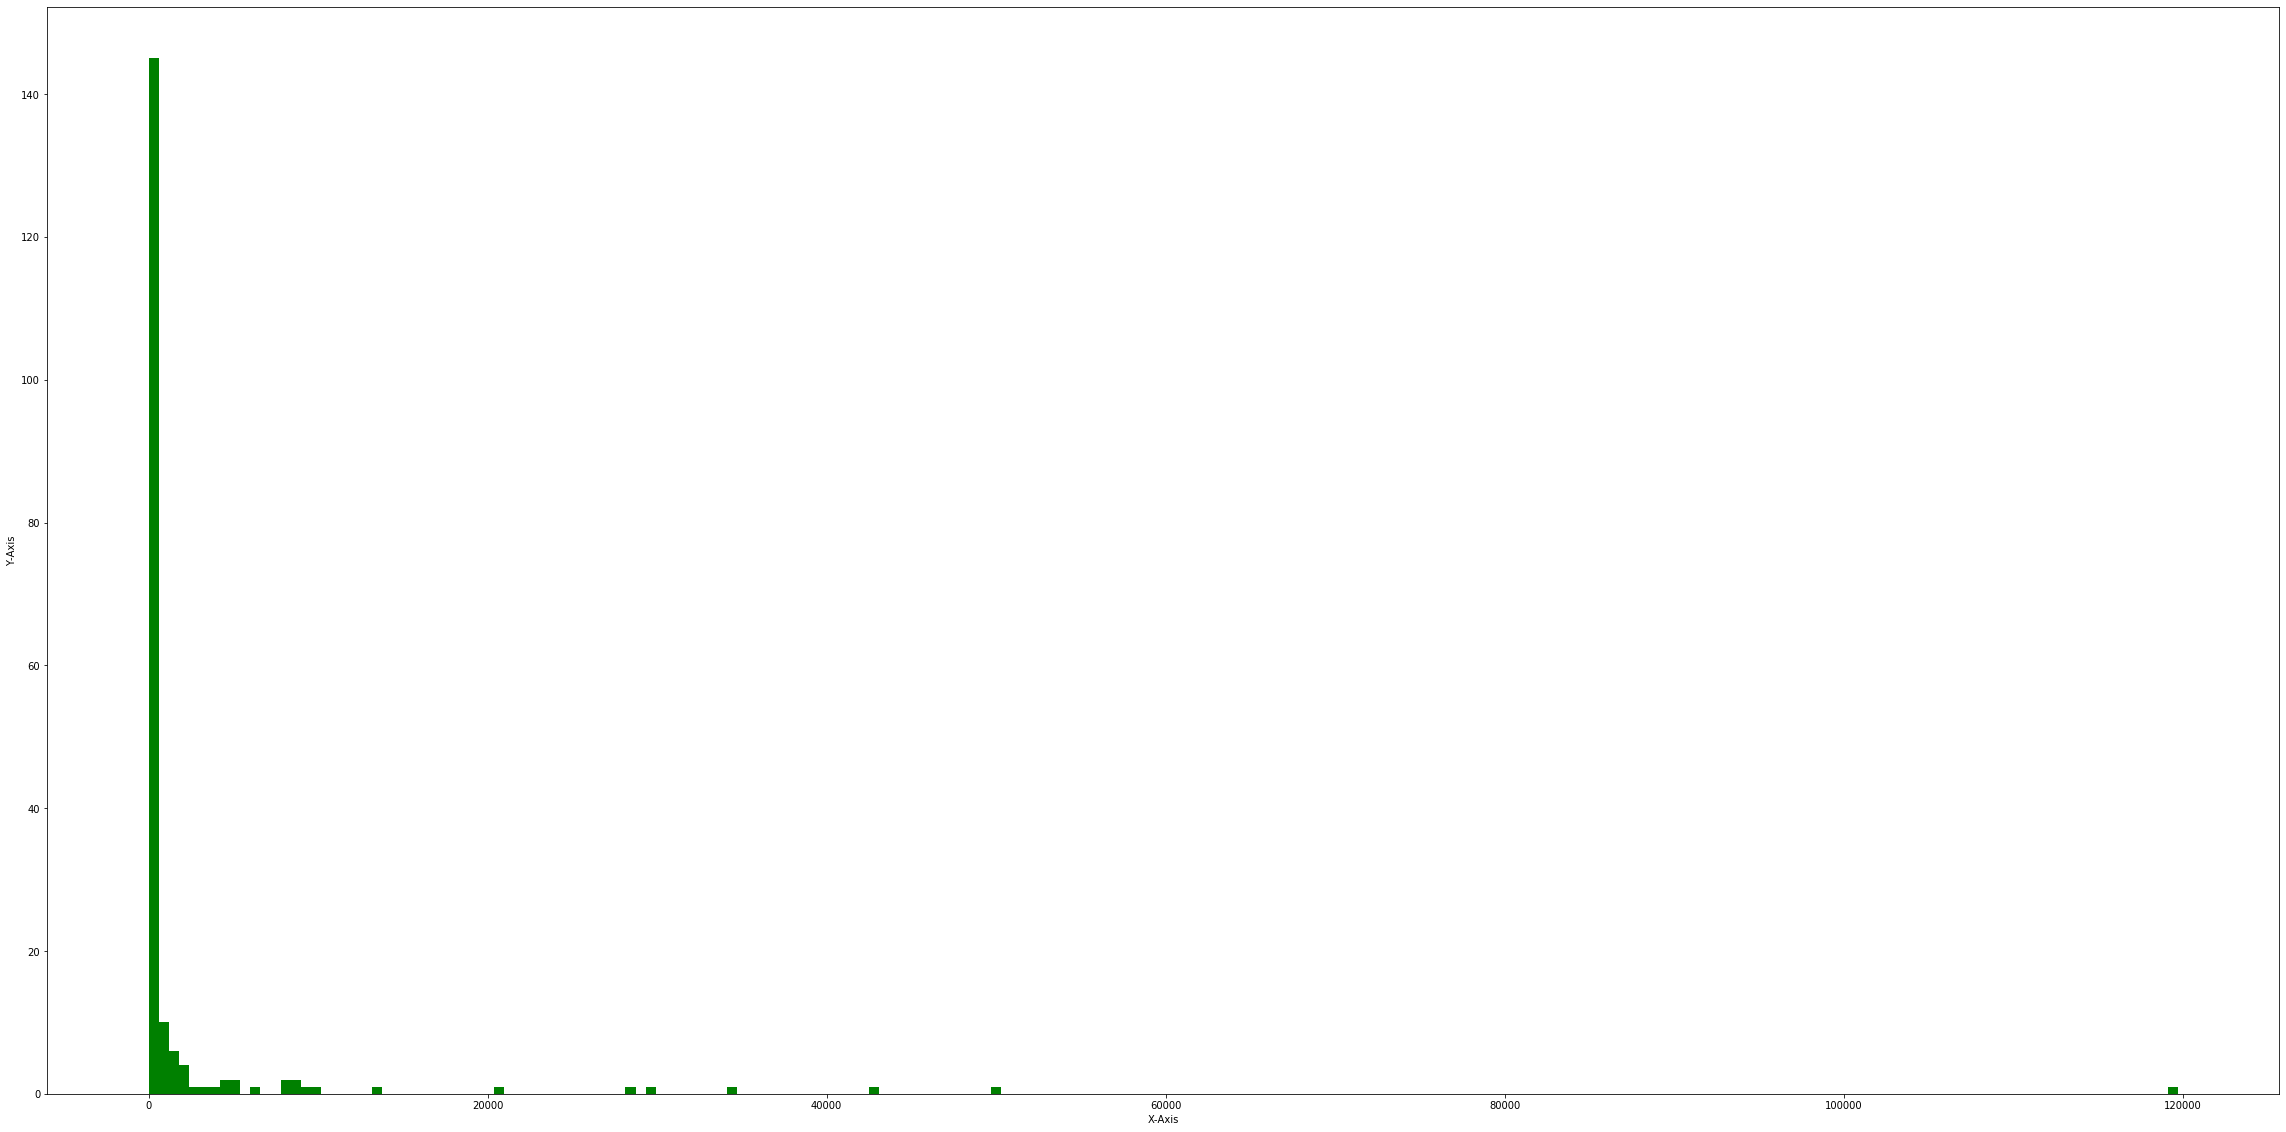

In [18]:
#Plotting hsitogram of deaths,Confirmed cases,active cases,recoverd cases
plt.figure(figsize=(40,20))
num_bins = 200
plt.hist(df['Deaths'],num_bins,color = 'green')
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis')
plt.show() 

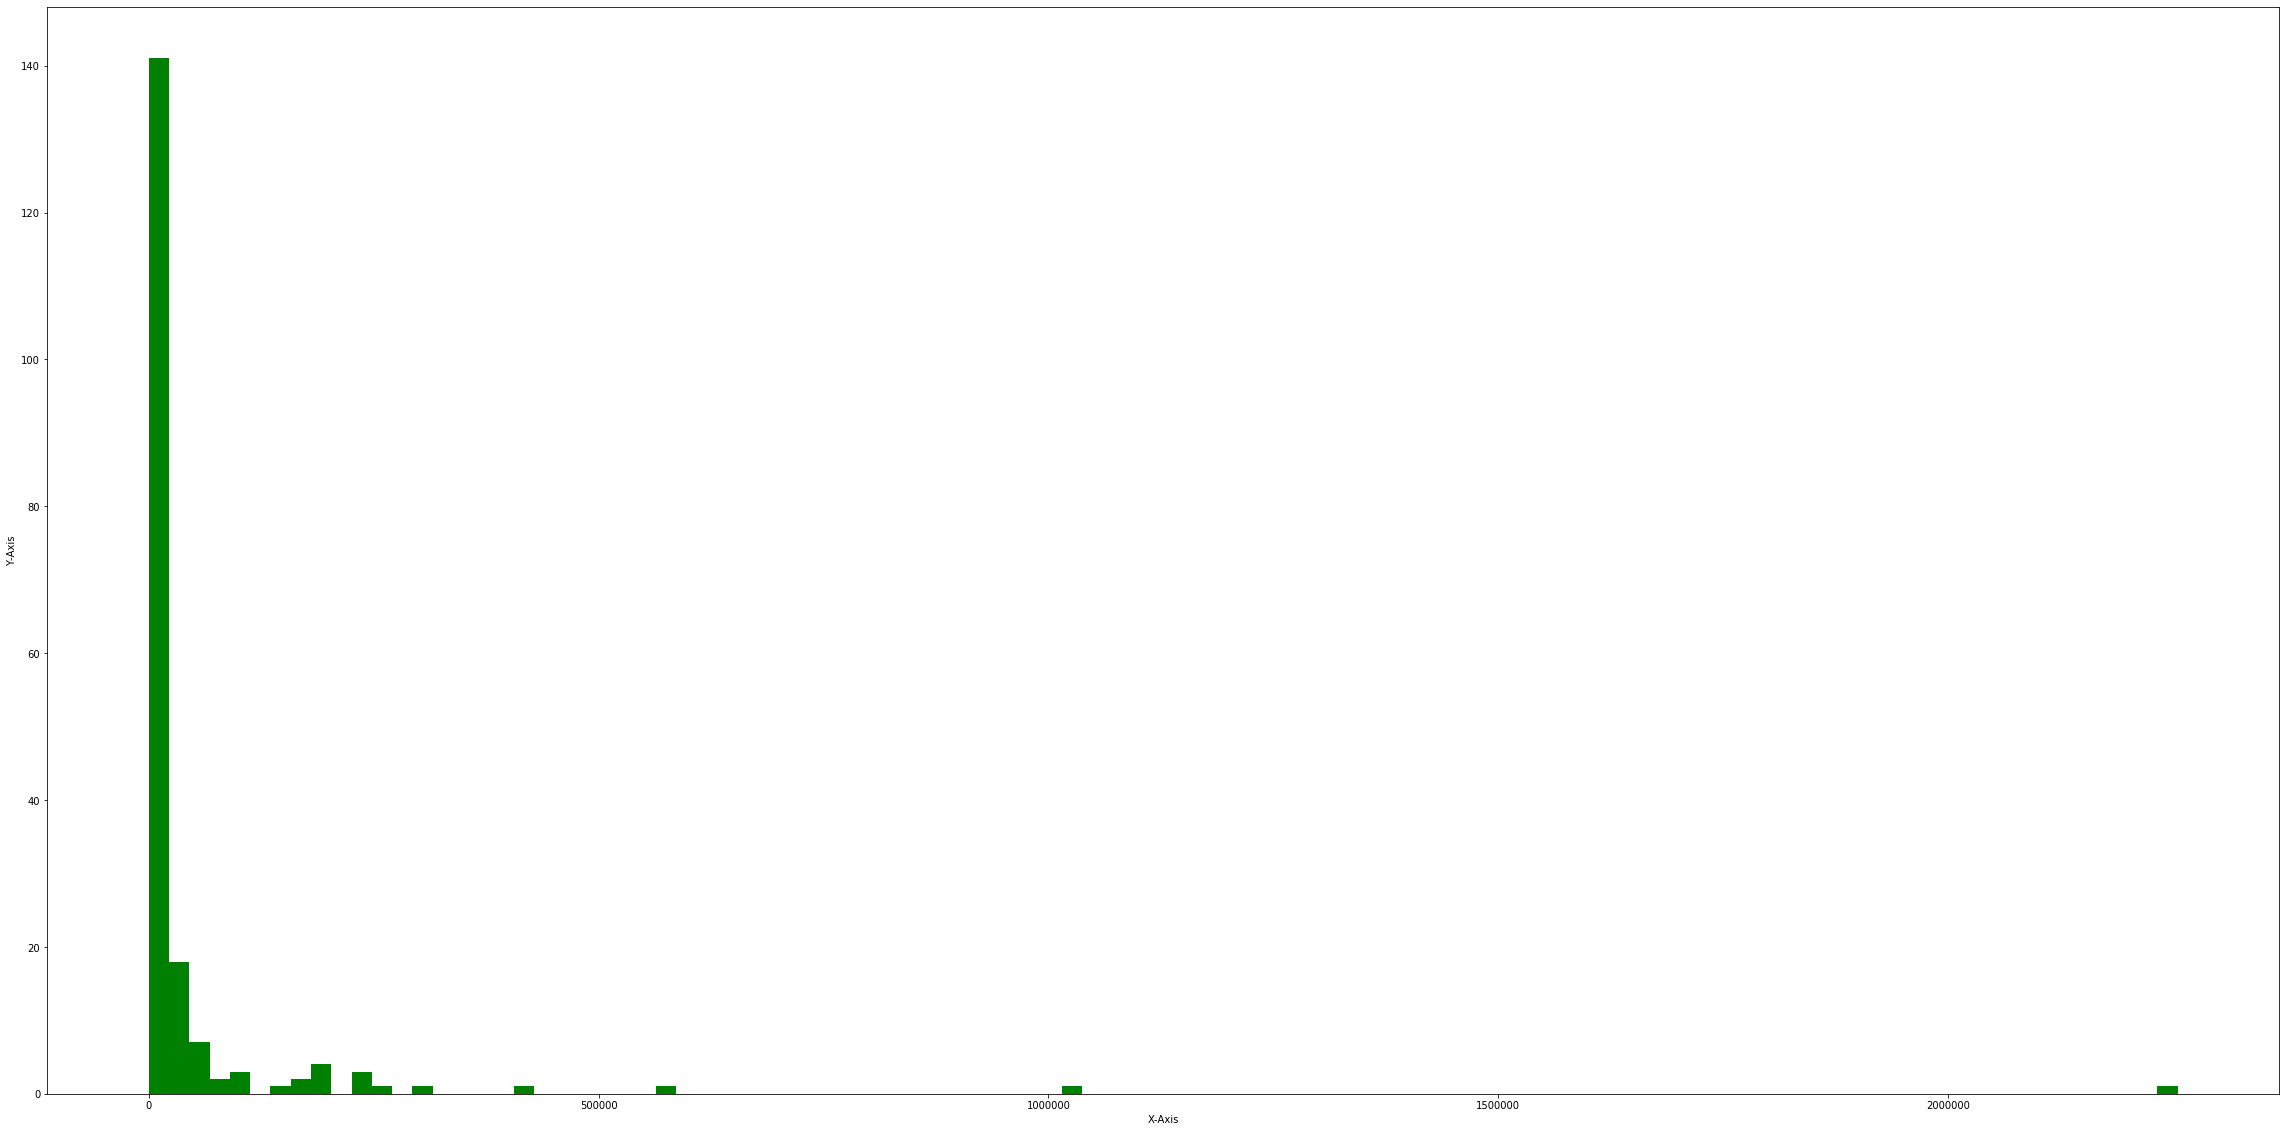

In [17]:
plt.figure(figsize=(40,20))
num_bins = 100
plt.hist(df['Confirmed'],num_bins,color = 'green')
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis')
plt.show() 

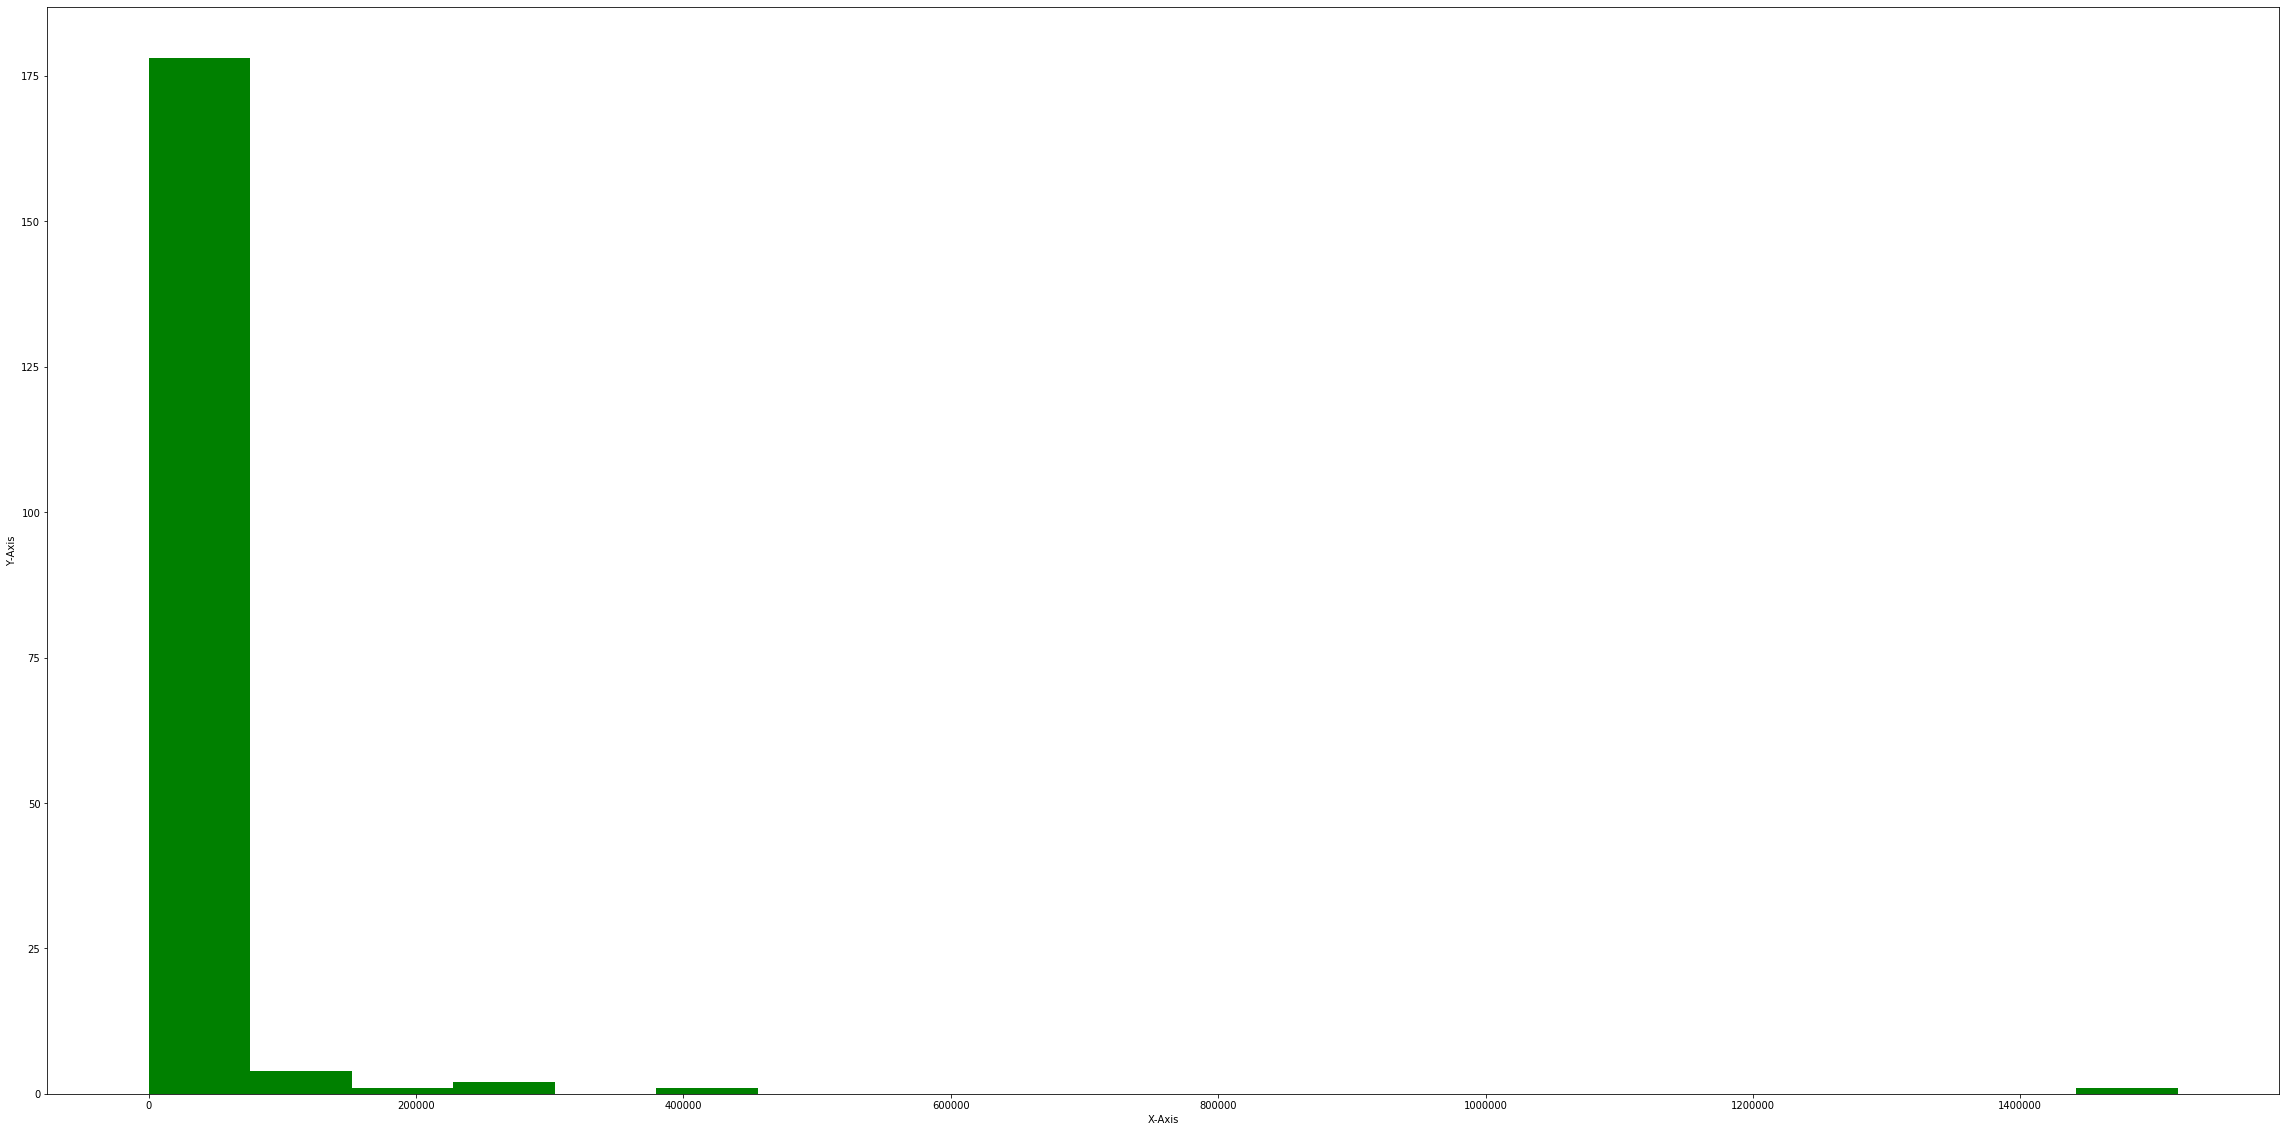

In [13]:
plt.figure(figsize=(40,20))
num_bins = 20
plt.hist(df['Active'],num_bins,color = 'green')
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis')
plt.show() 

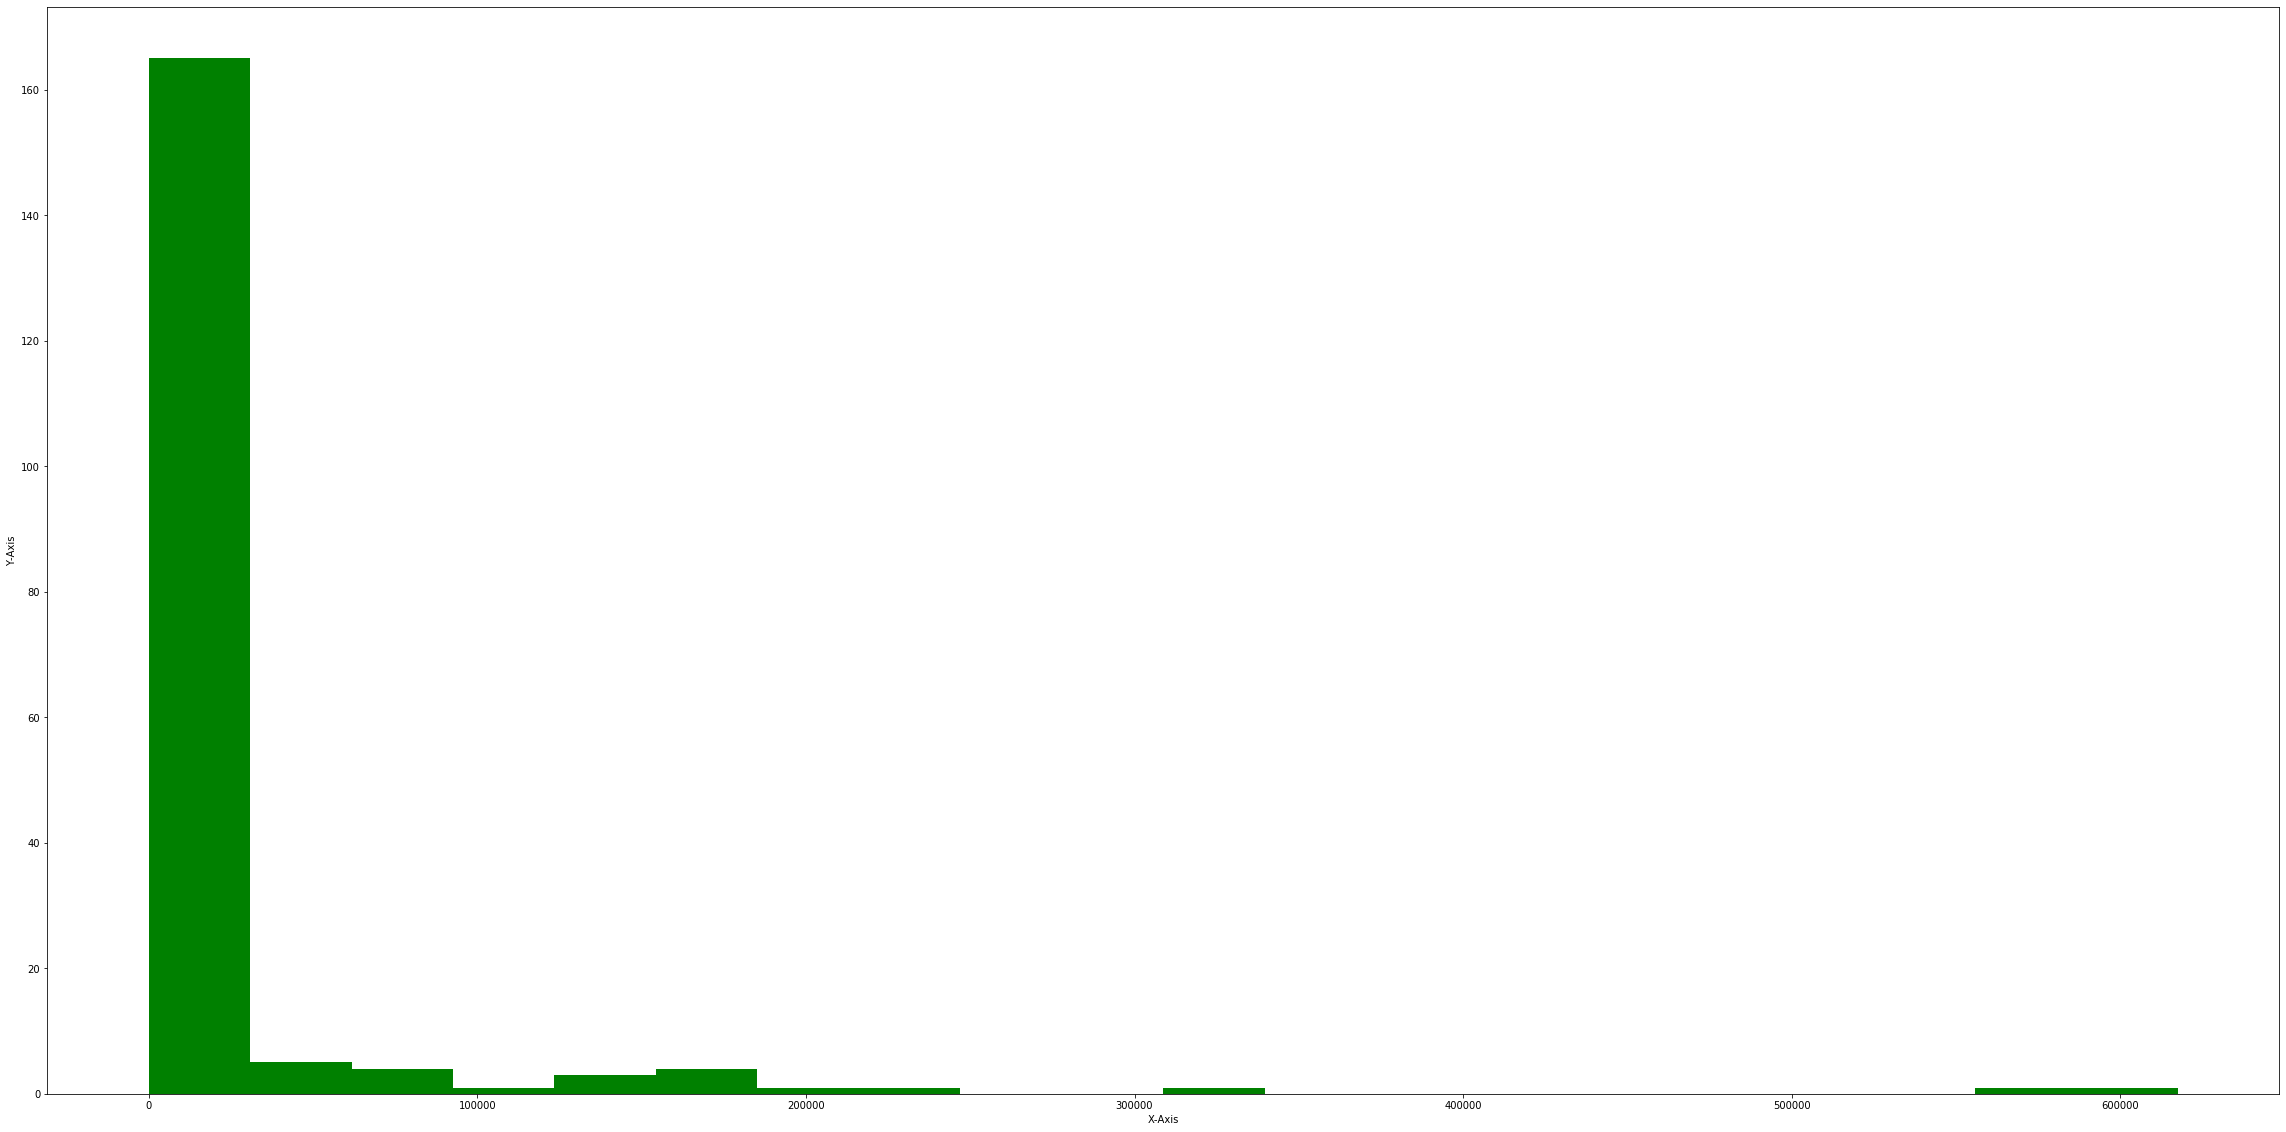

In [14]:
plt.figure(figsize=(40,20))
num_bins = 20
plt.hist(df['Recovered'],num_bins,color = 'green')
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis')
plt.show() 

In [24]:
df['Confirmed'].mean()

47010.978609625665

We perform a One-Sample t-Test where we try to find that whether the mean of the variable ‘Confirmed’ is statistically greater than 47000 or not. 
Thus we assume that mean of ‘Confirmed’ is greater than 47000 which forms our Null Hypothesis. 
Alternatively, the Alternative Hypothesis is that the mean of ‘Confirmed’ is statistically 
significantly less than 47000. We now run a One-Sample t-Test to test this hypothesis.

In [27]:
stats.ttest_1samp(df['Confirmed'],45000)

Ttest_1sampResult(statistic=0.14279174572090356, pvalue=0.8866092210490143)

Our p-value comes out to be 0.8866092210490143 which is greater than 0.05 (5% significance level) therefore, we accept the null hypothesis which states that mean is statically greater than 45000 and is not due to random chance.

Z-Test
Z-test is used to test whether the two datasets are similar or not.
So we will import a similiar kind of a dataset known as worldometer_data.csv

In [28]:
dg = pd.read_csv("worldometer_data.csv")

In [29]:
Mean1 = df['Confirmed'].mean()
Mean1

47010.978609625665

In [31]:
Mean2 = dg['TotalCases'].mean()
Mean2

42290.30622009569

We find that the mean of the population (47010.97) and its sample (42290.30) is different however as we know that the sample is a part of the population only, the results of our Z-Test should indicate that the difference between their mean is statistically insignificant especially if the sample size is more than 30. To confirm this we perform a Z-Test

In [32]:
X2 = np.array(df['Confirmed'])
X2

array([  28424,    1891,   11631,     855,     176,      26,   41204,
         19708,    7461,   17323,   12238,     104,   21331,  108775,
            97,   57936,   60550,      22,     650,      68,   23512,
          3273,      89, 1032913,     141,    3872,     901,     287,
           104,     863,     129,   11610,  102749,    2686,     858,
        236748,   84553,   63454,     247,     883,    5672,    2127,
          7276,    2299,    2309,     985,   10448,   12578,    4565,
            18,   25778,   49731,   53758,    4475,    1664,     143,
          1981,     627,    4469,      18,    7142,  196724,    4428,
            37,     898,  190670,   13717,    3256,      13,      23,
         12755,    4960,    1541,     183,    5077,      12,   12306,
          4086,    1822,  410451,   45029,  202584,   29222,   25374,
         20633,  238275,     657,   17725,    1015,   17225,    4478,
          1486,   39145,    2981,      19,    1111,    1536,       4,
           601,     

In [33]:
Y2 = np.array(dg['TotalCases'])
Y2

array([2330578, 1070139,  576952,  411773,  303110,  293018,  251338,
        238275,  236748,  202584,  191216,  186493,  176617,  175202,
        160093,  154233,  108775,  101019,   92681,   86488,   65633,
         60550,   57936,   56043,   53758,   49731,   49502,   45029,
         44533,   41833,   41204,   39145,   38841,   35825,   31620,
         31243,   29400,   29222,   28833,   28566,   25778,   25374,
         25222,   23730,   23512,   21331,   20633,   19808,   19708,
         17799,   17323,   17225,   13953,   13717,   12803,   12755,
         12421,   12391,   12306,   12238,   11631,   11610,   10448,
          9839,    8742,    8605,    8580,    8556,    7461,    7276,
          7142,    6216,    5783,    5672,    5399,    5077,    5005,
          4960,    4565,    4478,    4475,    4469,    4428,    4105,
          4086,    3872,    3789,    3273,    3256,    3151,    3148,
          2813,    2755,    2686,    2404,    2309,    2299,    2187,
          2163,    2

In [35]:
ztest(Y2,x2=None,value = Mean1)

(-0.3625854889926753, 0.7169145517487292)

Our null hypothesis in this scenario will be that both the data sets are significantly similar. If we consider the significance level to be at 5%, then to accept the null hypothesis, our p-value should be more than the chosen significance level. In our example, the p-value is well above 0.05 (5%) thus the  Z- Test correctly indicates that the means of both the dataset are same and are not statistically significantly different from each other.

Correlation Coefficient Matrix

If we have a lot of variables then rather than calculating the correlation coefficient for each combination of variables, we can come up with Correlation Coefficient Matrix. Here all the diagonal values will be 1 while correlation coefficient will be there for all the combination of the numerical variables. There are two methods of calculating  Correlation Coefficient and its matrix – Pearson and Spearman.

Correlation Coefficient matrix using Spearman:-

In [5]:
df.corr(method="spearman")

,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths___100_Cases,Recovered___100_Cases,Deaths___100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase
Confirmed,1.000000,0.935986,0.896076,0.915883,0.799790,0.752715,0.697920,0.314122,-0.252432,0.318582,0.998614,0.899827,0.269241
Deaths,0.935986,1.000000,0.832498,0.836688,0.708579,0.755633,0.611836,0.575461,-0.234690,0.544945,0.937659,0.804187,0.184433
Recovered,0.896076,0.832498,1.000000,0.735836,0.716618,0.650400,0.736178,0.246127,0.024203,0.186120,0.899672,0.760763,0.174944
Active,0.915883,0.836688,0.735836,1.000000,0.817528,0.782855,0.683282,0.230584,-0.565017,0.382358,0.903669,0.959314,0.500893
New_cases,0.799790,0.708579,0.716618,0.817528,1.000000,0.792443,0.781775,0.115041,-0.361843,0.216540,0.786587,0.858747,0.497817
New_deaths,0.752715,0.755633,0.650400,0.782855,0.792443,1.000000,0.691597,0.297737,-0.346704,0.380267,0.740835,0.788787,0.386783
New_recovered,0.697920,0.611836,0.736178,0.683282,0.781775,0.691597,1.000000,0.051562,-0.177597,0.103457,0.688206,0.740538,0.395904
Deaths___100_Cases,0.314122,0.575461,0.246127,0.230584,0.115041,0.297737,0.051562,1.000000,-0.100067,0.867962,0.322724,0.167853,-0.087752
Recovered___100_Cases,-0.252432,-0.234690,0.024203,-0.565017,-0.361843,-0.346704,-0.177597,-0.100067,1.000000,-0.468560,-0.227791,-0.494080,-0.669393
Deaths___100_Recovered,0.318582,0.544945,0.186120,0.382358,0.216540,0.380267,0.103457,0.867962,-0.468560,1.000000,0.315494,0.300048,0.179836


Correlation Coefficient matrix using Pearson:-

In [6]:
df.corr(method="pearson")

,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths___100_Cases,Recovered___100_Cases,Deaths___100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase
Confirmed,1.000000,0.931061,0.910469,0.967201,0.857367,0.775704,0.696420,0.129028,-0.109280,0.070603,0.998494,0.894143,-0.012675
Deaths,0.931061,1.000000,0.804980,0.915389,0.742682,0.697769,0.543200,0.296149,-0.143142,0.211663,0.938733,0.758434,-0.065803
Recovered,0.910469,0.804980,1.000000,0.776385,0.719943,0.854196,0.841313,0.118772,-0.012327,-0.030762,0.896205,0.919319,-0.005114
Active,0.967201,0.915389,0.776385,1.000000,0.872657,0.658980,0.552175,0.107930,-0.157020,0.115157,0.973067,0.805054,-0.011398
New_cases,0.857367,0.742682,0.719943,0.872657,1.000000,0.581485,0.565431,0.031016,-0.121273,0.000288,0.856372,0.764189,0.083481
New_deaths,0.775704,0.697769,0.854196,0.658980,0.581485,1.000000,0.922444,0.112784,-0.090852,0.045264,0.747075,0.917728,0.077951
New_recovered,0.696420,0.543200,0.841313,0.552175,0.565431,0.922444,1.000000,0.013593,-0.044056,-0.027234,0.662525,0.890790,0.084905
Deaths___100_Cases,0.129028,0.296149,0.118772,0.107930,0.031016,0.112784,0.013593,1.000000,-0.105288,0.296245,0.138177,0.039113,-0.168201
Recovered___100_Cases,-0.109280,-0.143142,-0.012327,-0.157020,-0.121273,-0.090852,-0.044056,-0.105288,1.000000,-0.265879,-0.108921,-0.099296,-0.526754
Deaths___100_Recovered,0.070603,0.211663,-0.030762,0.115157,0.000288,0.045264,-0.027234,0.296245,-0.265879,1.000000,0.078636,-0.003256,-0.073455


Covariance Matrix
Calculating the covariance matrix we will use the following command:

In [7]:
df.cov()

C:\Users\Rajesh\anaconda3\lib\site-packages\numpy\lib\function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths___100_Cases,Recovered___100_Cases,Deaths___100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase
Confirmed,3.708944e+10,1.934423e+09,1.311441e+10,2.204061e+10,4.669415e+08,1.491303e+07,3.462150e+08,92539.698466,-593097.814503,NaN,3.342251e+10,3.666934e+09,-41414.304108
Deaths,1.934423e+09,1.163848e+08,6.495192e+08,1.168519e+09,2.265801e+07,7.514580e+05,1.512717e+07,11898.056843,-43518.723747,NaN,1.760187e+09,1.742358e+08,-12043.770788
Recovered,1.311441e+10,6.495192e+08,5.593934e+09,6.870958e+09,1.522746e+08,6.377655e+06,1.624297e+08,33081.823770,-25982.216866,NaN,1.165022e+10,1.464186e+09,-6488.603665
Active,2.204061e+10,1.168519e+09,6.870958e+09,1.400113e+10,2.920090e+08,7.783916e+06,1.686581e+08,47559.817853,-523596.873890,NaN,2.001210e+10,2.028512e+09,-22881.929655
New_cases,4.669415e+08,2.265801e+07,1.522746e+08,2.920090e+08,7.997269e+06,1.641550e+05,4.127622e+06,326.646623,-9664.875758,NaN,4.209219e+08,4.601962e+07,4005.229790
New_deaths,1.491303e+07,7.514580e+05,6.377655e+06,7.783916e+06,1.641550e+05,9.965277e+03,2.377025e+05,41.928581,-255.588365,NaN,1.296215e+07,1.950876e+06,132.019776
New_recovered,3.462150e+08,1.512717e+07,1.624297e+08,1.686581e+08,4.127622e+06,2.377025e+05,6.663442e+06,130.672493,-3204.936141,NaN,2.972489e+08,4.896614e+07,3718.366937
Deaths___100_Cases,9.253970e+04,1.189806e+04,3.308182e+04,4.755982e+04,3.266466e+02,4.192858e+01,1.306725e+02,13.868713,-11.049869,NaN,8.943792e+04,3.101780e+03,-10.627192
Recovered___100_Cases,-5.930978e+05,-4.351872e+04,-2.598222e+04,-5.235969e+05,-9.664876e+03,-2.555884e+02,-3.204936e+03,-11.049869,794.182648,NaN,-5.335092e+05,-5.958861e+04,-251.848610
Deaths___100_Recovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 2160x720 with 0 Axes>

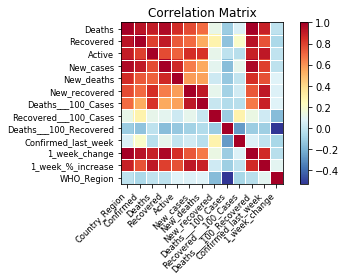

In [5]:
plt.figure(figsize=(30,10))
fig = correlation.plot_corr(df.corr(),xnames = df.columns,ynames = df.columns)
plt.show(fig)